**COVID detection using CNN** <br>
--  Custom ResNet Architecture with 56 layers

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
import os
from tqdm.notebook import tqdm

In [16]:
labels = ["COVID","NORMAL"]

In [17]:
# from google.colab import drive
# drive.mount('/content/drive')

In [16]:
dataset_dir = "dataset/covidx/"

In [17]:
test_path = dataset_dir + '/test/'
train_path = dataset_dir + '/train/'


In [19]:
os.chdir(r"C:\Users\user\OneDrive - University of Wolverhampton\fyp\final\model")
len(os.listdir(train_path+"COVID"))

2915

In [20]:
len(os.listdir(train_path+"NORMAL"))

2900

In [21]:
print(os.listdir(train_path))

['COVID', 'NORMAL']


In [22]:
os.listdir(test_path)

['COVID', 'NORMAL']

In [23]:
import cv2, os
import numpy as np

In [24]:

X_train = []
y_train = []

for folder in os.listdir(train_path):
  for image in tqdm(os.listdir(os.path.join(train_path, folder))):
    img = cv2.imread(os.path.join(train_path, folder, image))
    img = cv2.resize(img, (224,224))
    img = np.array(img, dtype='float32')
    X_train.append(img)
    y_train.append(folder)

  0%|          | 0/2915 [00:00<?, ?it/s]

  0%|          | 0/2900 [00:00<?, ?it/s]

In [33]:
type(X_train)

list

In [25]:
print(len(X_train))

5815


In [27]:
print(len(y_train))

5815


In [36]:
X_test = []
y_test = []

for folder in os.listdir(test_path):
  for image in tqdm(os.listdir(os.path.join(test_path, folder))):
    img = cv2.imread(os.path.join(test_path, folder, image))
    img = cv2.resize(img, (224,224))
    img = np.array(img, dtype='float32')
    X_test.append(img)
    y_test.append(folder)

  0%|          | 0/700 [00:00<?, ?it/s]

  0%|          | 0/700 [00:00<?, ?it/s]

In [37]:
label_train = []
for ele in y_train:
  if ele == "NORMAL":
    label_train.append(0)
  else:
    label_train.append(1)

In [38]:
label_test = []
for ele in y_test:
  if ele == "NORMAL":
    label_test.append(0)
  else:
    label_test.append(1)

In [39]:
X_train = np.array(X_train, dtype='float32')
X_test = np.array(X_test, dtype='float32')

In [109]:
d = {'Data':[]}
for i in label_train:
    if i==0:
        d["Data"].append(i)
    else:
        d['Data'].append(i)
d

{'Data': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  

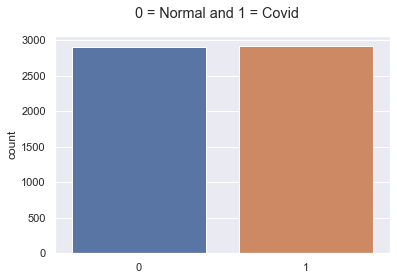

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
sns.countplot(x="Data",data= d)
plt.suptitle("0 = Normal and 1 = Covid")
plt.show()

In [85]:
label_train = np.array(label_train)
label_test = np.array(label_test)
label_train

array([1, 1, 1, ..., 0, 0, 0])

In [82]:
import pandas as pd
train_count = pd.DataFrame(label_train)

In [32]:
X_train.shape

(5815, 224, 224, 3)

In [33]:
X_test.shape

(1400, 224, 224, 3)

In [20]:
X_train

array([[[[139., 139., 139.],
         [139., 139., 139.],
         [139., 139., 139.],
         ...,
         [  4.,   4.,   4.],
         [  4.,   4.,   4.],
         [  5.,   5.,   5.]],

        [[ 13.,  13.,  13.],
         [ 13.,  13.,  13.],
         [ 13.,  13.,  13.],
         ...,
         [  2.,   2.,   2.],
         [  2.,   2.,   2.],
         [  2.,   2.,   2.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  1.,   1.,   1.],
         [  2.,   2.,   2.],
         [  2.,   2.,   2.]],

        ...,

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[  0.,   0.,   0.],
       

In [21]:
print(type(label_train))
label_train.shape

<class 'numpy.ndarray'>


(5815,)

In [22]:
label_train = label_train.reshape(-1,1)
label_test = label_test.reshape(-1,1)
print(label_test.shape)
label_train.shape

(1400, 1)


(5815, 1)

In [72]:
# import pickle

# with open('X_train.pickle', 'wb') as f:
#   pickle.dump(X_train, f)

# with open('y_train.pickle', 'wb') as f:
#   pickle.dump(label_train, f)

In [73]:
# with open('X_test.pickle', 'wb') as f:
#   pickle.dump(X_test, f)


# with open('y_test.pickle', 'wb') as f:
#   pickle.dump(label_test, f)

In [34]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

5815
5815
1400
1400


In [35]:
# X_train_new = pickle.load(open('X_train.pickle', 'rb'))
# y_train_new = pickle.load(open('y_train.pickle', 'rb'))
# X_test_new = pickle.load(open('X_test.pickle', 'rb'))
# y_test_new = pickle.load(open('y_test.pickle', 'rb'))

(Left) - Normal (0) Vs (Right) - COVID (1)
-----------------------------------------------------------------------------------------------------------------------------------


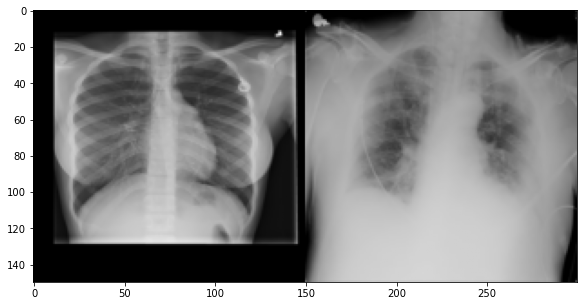

(Left) - Normal (0) Vs (Right) - COVID (1)
-----------------------------------------------------------------------------------------------------------------------------------


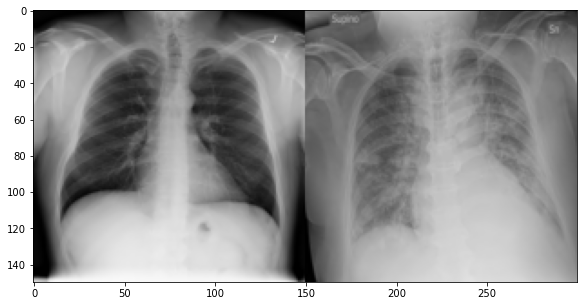

(Left) - Normal (0) Vs (Right) - COVID (1)
-----------------------------------------------------------------------------------------------------------------------------------


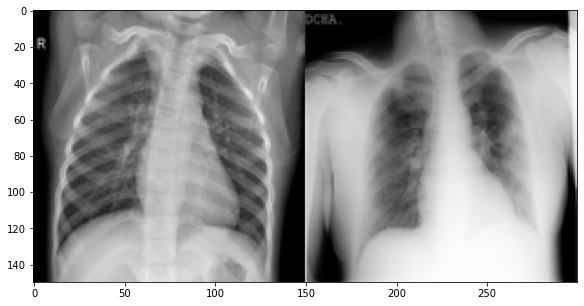

(Left) - Normal (0) Vs (Right) - COVID (1)
-----------------------------------------------------------------------------------------------------------------------------------


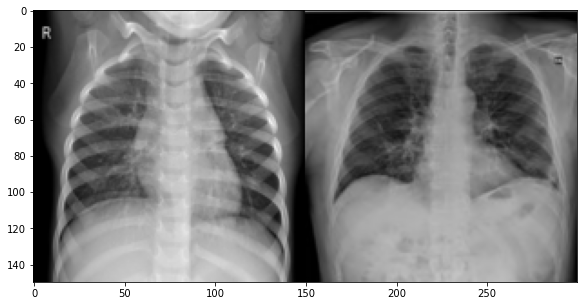

(Left) - Normal (0) Vs (Right) - COVID (1)
-----------------------------------------------------------------------------------------------------------------------------------


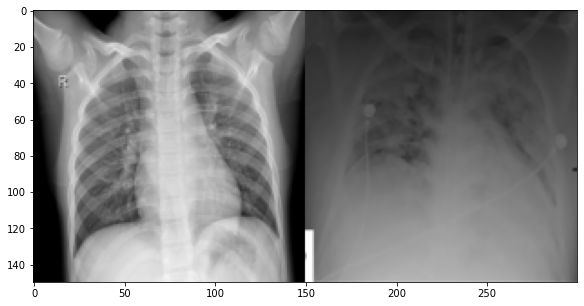

(Left) - Normal (0) Vs (Right) - COVID (1)
-----------------------------------------------------------------------------------------------------------------------------------


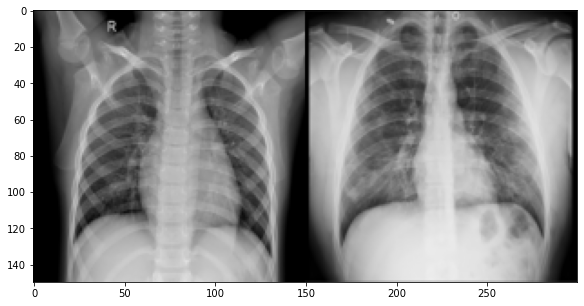

(Left) - Normal (0) Vs (Right) - COVID (1)
-----------------------------------------------------------------------------------------------------------------------------------


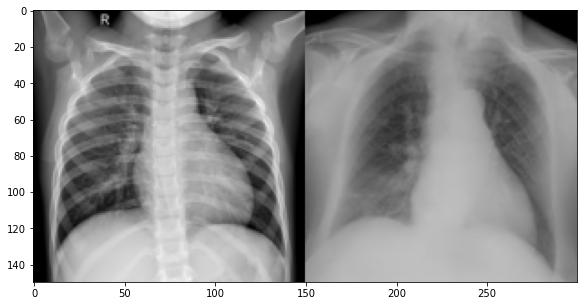

(Left) - Normal (0) Vs (Right) - COVID (1)
-----------------------------------------------------------------------------------------------------------------------------------


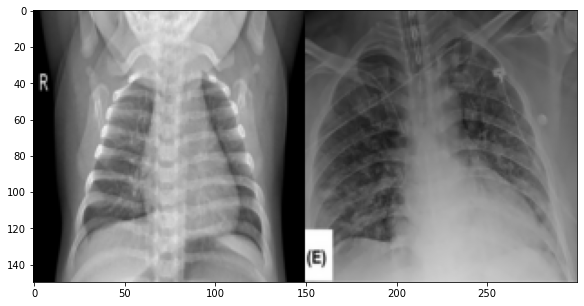

(Left) - Normal (0) Vs (Right) - COVID (1)
-----------------------------------------------------------------------------------------------------------------------------------


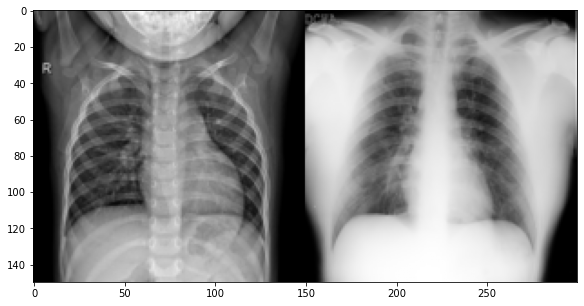

(Left) - Normal (0) Vs (Right) - COVID (1)
-----------------------------------------------------------------------------------------------------------------------------------


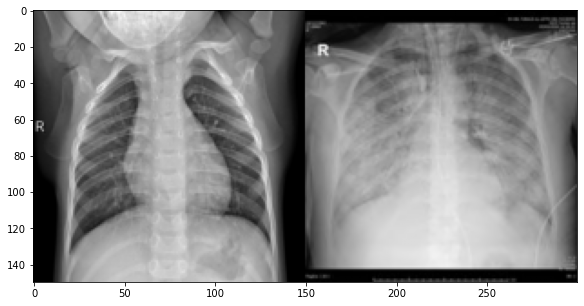

In [36]:
import matplotlib.pyplot as plt
import cv2
import skimage.transform
covid_images = os.listdir(test_path + "COVID")
normal_images = os.listdir(test_path + "NORMAL")
def plotter(i):
    image_covid = cv2.imread(test_path+"COVID/"+covid_images[i])
    image_covid = skimage.transform.resize(image_covid, (150, 150, 3) , mode = 'reflect')
    image_normal = cv2.imread(test_path+"NORMAL/"+normal_images[i])
    image_normal = skimage.transform.resize(image_normal, (150, 150, 3))
    pair = np.concatenate((image_normal, image_covid), axis=1)
    print("(Left) - Normal (0) Vs (Right) - COVID (1)")
    print("-----------------------------------------------------------------------------------------------------------------------------------")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,10):
    plotter(i)

In [37]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

In [4]:
import numpy as np
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, MaxPooling2D, Dropout

In [39]:
def identity_block(X, f, filters):
    F1, F2 = filters

    X_shortcut = X
    X = Conv2D(filters=F1, kernel_size = 1, strides=1, padding="same")(X)
    X = BatchNormalization()(X)
    X = Activation("relu")(X)

    X = Conv2D(filters=F2, kernel_size = 1, strides=1, padding="same")(X)
    X = BatchNormalization()(X)

    X = Add()([X, X_shortcut])
    X = Activation("relu")(X)
    return X

In [40]:
def convolutional_block(X, f, filters):
    F1, F2 = filters

    X_shortcut = X
    X = Conv2D(filters=F1, kernel_size = 1, strides=2, padding="same")(X)
    X = BatchNormalization()(X)
    X = Activation("relu")(X)

    X = Conv2D(filters=F2, kernel_size = 3, strides=1, padding="same")(X)
    X = BatchNormalization()(X)

    X_shortcut = Conv2D(filters = F2, kernel_size = 1, strides=2, padding="same")(X_shortcut)
    X_shortcut = BatchNormalization()(X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation("relu")(X)
    return X

In [41]:
from keras.models import Model
def ResNet(input_shape, classes):
    X_input = Input(input_shape)
    
    X = Conv2D(64, 3, strides=2)(X_input)
    X = BatchNormalization()(X)
    X = Activation("relu")(X)
    X = MaxPooling2D(3, strides=2)(X)

    X = convolutional_block(X, f=3, filters =[64,128])
    X = identity_block(X, f=3, filters = [64,128])
    X = identity_block(X, f=3, filters = [64,128])

    X = convolutional_block(X, f=3, filters =[256,512])
    X = identity_block(X,f=3, filters = [256,512])
    X = identity_block(X,f=3, filters = [256,512])

    if classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = classes

    X = MaxPooling2D(pool_size=(2, 2), padding='same')(X)
    X = Flatten()(X)
    X = Dropout(0.2)(X)
    X = Dense(units, activation =activation)(X)

    model = Model(inputs=X_input, outputs=X, name='ResNet')

    return model

In [42]:
resnet =ResNet(input_shape = (224,224,3),classes=2)

In [44]:
len(resnet.layers)

55

In [45]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [46]:
resnet.summary()  

Model: "ResNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 64) 0           batch_normalization[0][0]        
_____________________________________________________________________________________________

In [47]:
resnet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

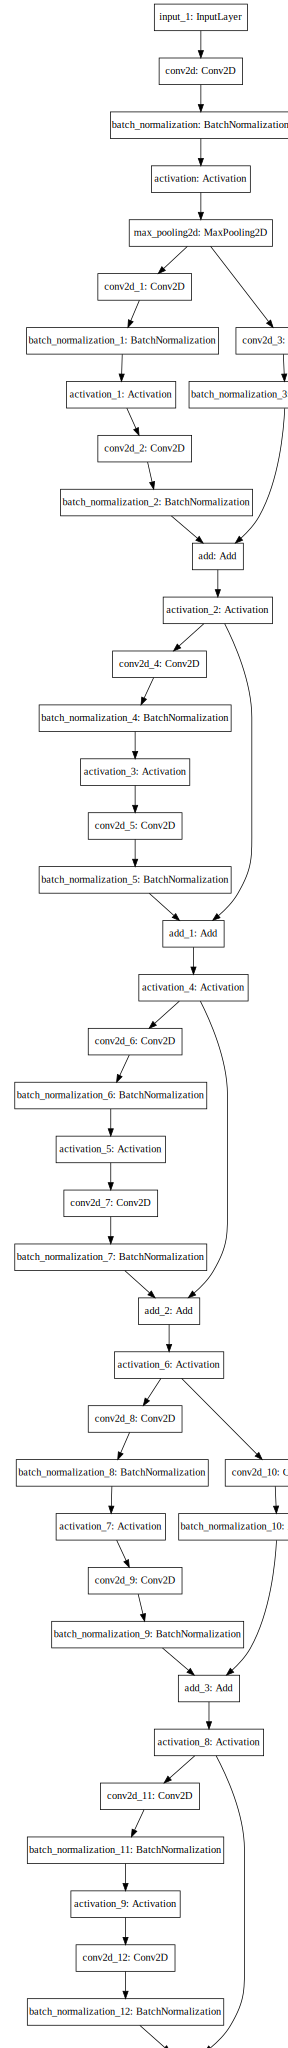

In [48]:
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

plot_model(resnet, to_file='resnet56.png')
SVG(model_to_dot(resnet).create(prog='dot', format='svg'))

ReduceLROnPlateu = Reduce learning rate when a metric (val_loss) has stopped improving.

In [49]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_delta=0.0001, patience=1, verbose=1)


In [50]:
tb_callbacks = tf.keras.callbacks.TensorBoard(log_dir="logs/adam", histogram_freq =1)

In [51]:
filepath="weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [52]:
resnet.summary()

Model: "ResNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 64) 256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 64) 0           batch_normalization[0][0]        
_____________________________________________________________________________________________

In [53]:
history = resnet.fit(X_train, label_train, epochs = 10, validation_split=0.15, callbacks=[tb_callbacks, lr_reduce, checkpoint])

Epoch 1/10
155/155 [==============================] - 558s 4s/step - loss: 2.4355 - accuracy: 0.7759 - val_loss: 18.8287 - val_accuracy: 0.0069

Epoch 00001: val_accuracy improved from -inf to 0.00687, saving model to weights.hdf5
Epoch 2/10
155/155 [==============================] - 606s 4s/step - loss: 0.3434 - accuracy: 0.9143 - val_loss: 23.5193 - val_accuracy: 0.0069

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00002: val_accuracy did not improve from 0.00687
Epoch 3/10
155/155 [==============================] - 595s 4s/step - loss: 0.2299 - accuracy: 0.9379 - val_loss: 0.3972 - val_accuracy: 0.8923

Epoch 00003: val_accuracy improved from 0.00687 to 0.89233, saving model to weights.hdf5
Epoch 4/10
155/155 [==============================] - 542s 3s/step - loss: 0.0664 - accuracy: 0.9749 - val_loss: 0.1501 - val_accuracy: 0.9588

Epoch 00004: val_accuracy improved from 0.89233 to 0.95876, saving model to weights.hdf5
Epoch 5/10
155/155 [=

In [54]:
resnet.save('resnet_covid.h5') 

In [14]:
from keras.models import load_model
load_resnet = load_model("resnet_covid.h5")

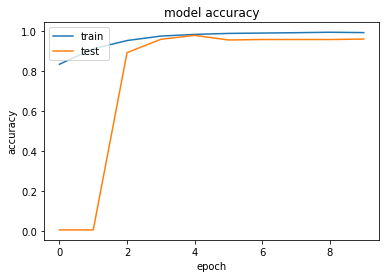

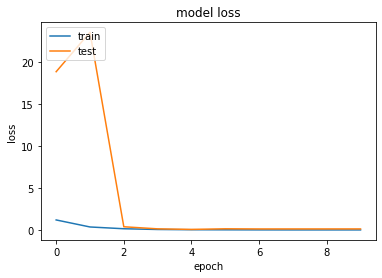

In [55]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
y_test

['COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',
 'COVID',


In [ ]:
test_set.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
label_test

array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [ ]:
y_pred

array([[1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1]])

## NOTE:
### NORMAL = 0
### COVID = 1

Text(0.5, 0.98, "CM when threshold '>0.5'")

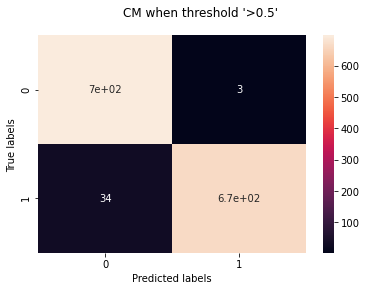

In [66]:
import seaborn as sns
import sklearn.metrics as metrics

y_pred = resnet.predict(X_test, workers=0)
y_pred = np.where(y_pred>0.5, 1, 0)
cm = metrics.confusion_matrix(label_test, y_pred)
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.suptitle("CM when threshold '>0.5'")

Text(0.5, 0.98, "CM when threshold '>0.75'")

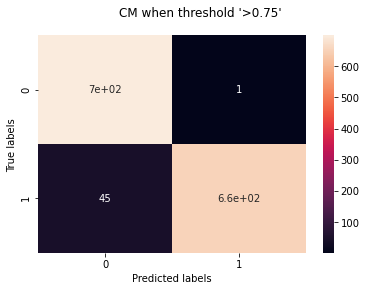

In [67]:
import seaborn as sns
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

y_pred = resnet.predict(X_test, workers=0)
y_pred = np.where(y_pred>0.75, 1, 0)
cm = metrics.confusion_matrix(label_test, y_pred)
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.suptitle("CM when threshold '>0.75'")

In [22]:
y_pred = load_resnet.predict(X_test, workers=0)
y_pred = np.where(y_pred>0.70, 'COVID positive', 'COVID negtive')
y_pred

array([[9.9998677e-01],
       [9.9931753e-01],
       [9.9999297e-01],
       ...,
       [1.4841883e-09],
       [3.0427314e-06],
       [6.9742226e-11]], dtype=float32)

In [63]:
cm

array([[696,   4],
       [ 47, 653]], dtype=int64)

In [59]:
print("Loss of the model is - " , resnet.evaluate(X_test, label_test)[0])
print("Accuracy of the model is - " ,resnet.evaluate(X_test,label_test)[1]*100 , "%")

44/44 [==============================] - 19s 427ms/step - loss: 0.1444 - accuracy: 0.9736
Loss of the model is -  0.14442287385463715
44/44 [==============================] - 20s 445ms/step - loss: 0.1444 - accuracy: 0.9736
Accuracy of the model is -  97.35714197158813 %


In [69]:
from sklearn.metrics import classification_report

In [61]:
print(classification_report(label_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       700
           1       1.00      0.94      0.97       700

    accuracy                           0.97      1400
   macro avg       0.97      0.97      0.97      1400
weighted avg       0.97      0.97      0.97      1400



<h1>VGG16 Architecture</h1>

In [5]:
from keras.models import Sequential
from keras.layers import MaxPool2D

vgg = Sequential()
vgg.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
vgg.add(BatchNormalization())

vgg.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg.add(BatchNormalization())

vgg.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(BatchNormalization())

vgg.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg.add(BatchNormalization())

vgg.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(BatchNormalization())

# vgg.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# vgg.add(BatchNormalization())

vgg.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg.add(BatchNormalization())

# vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# vgg.add(BatchNormalization())

# vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# vgg.add(BatchNormalization())

vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg.add(BatchNormalization())

# vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# vgg.add(BatchNormalization())

vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(BatchNormalization())

vgg.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
vgg.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
vgg.add(BatchNormalization())

vgg.add(Flatten())
vgg.add(Dropout(0.2))
vgg.add(Dense(units = 1, activation = 'sigmoid'))

In [45]:
len(vgg.layers)

26

In [46]:
vgg.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization_13 (Batc (None, 224, 224, 64)      256       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 112, 112, 64)      256       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
batch_normalization_15 (Batc (None, 112, 112, 128)    

In [47]:
vgg.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics=['accuracy'])


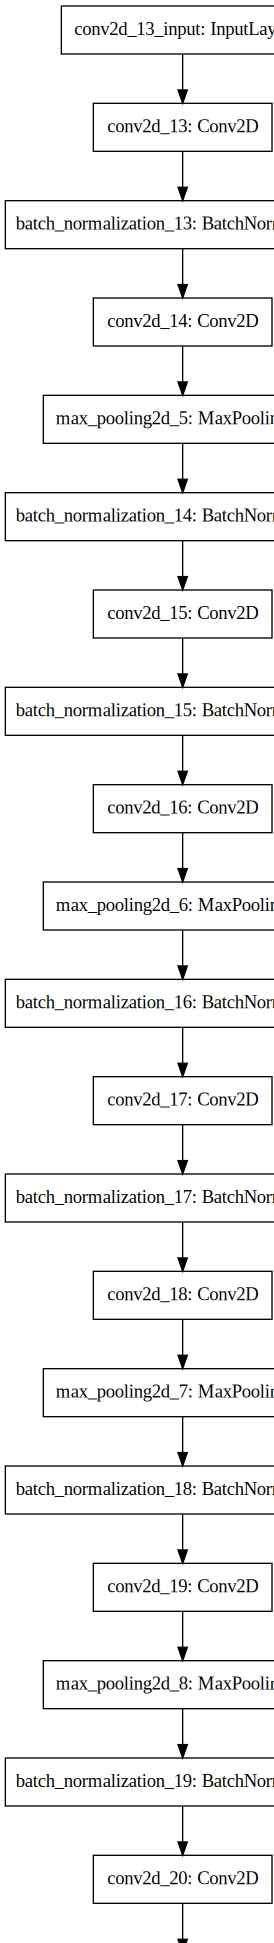

In [48]:
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

plot_model(vgg, to_file='model_vgg16.png')
SVG(model_to_dot(vgg).create(prog='dot', format='svg'))

In [49]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_delta=0.0001, patience=1, verbose=1)

In [50]:
filepath_vgg="weights_vgg.hdf5"
checkpoint = ModelCheckpoint(filepath_vgg, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [51]:
vgg_callbacks = tf.keras.callbacks.TensorBoard(log_dir="logs/vgg", histogram_freq =1)

In [53]:
history_vgg = vgg.fit(X_train, label_train, epochs = 10, validation_split = 0.15, callbacks = [vgg_callbacks,lr_reduce, checkpoint])

Epoch 1/10
155/155 [==============================] - 3520s 23s/step - loss: 1.1173 - accuracy: 0.7705 - val_loss: 0.2379 - val_accuracy: 0.9301

Epoch 00001: val_accuracy improved from -inf to 0.93013, saving model to weights_vgg.hdf5
Epoch 2/10
155/155 [==============================] - 3499s 23s/step - loss: 0.3832 - accuracy: 0.8853 - val_loss: 5.3091 - val_accuracy: 0.0023

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00002: val_accuracy did not improve from 0.93013
Epoch 3/10
155/155 [==============================] - 3500s 23s/step - loss: 0.1603 - accuracy: 0.9483 - val_loss: 0.2567 - val_accuracy: 0.9061

Epoch 00003: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 00003: val_accuracy did not improve from 0.93013
Epoch 4/10
155/155 [==============================] - 3474s 22s/step - loss: 0.0876 - accuracy: 0.9678 - val_loss: 0.1958 - val_accuracy: 0.9359

Epoch 00004: val_accuracy improved from 0.93013 to 0

In [54]:
vgg.save('vgg_covid.h5') 

In [74]:
print("Loss of the model is - " , vgg.evaluate(X_test, label_test)[0])
print("Accuracy of the model is - ", vgg.evaluate(X_test,label_test)[1]*100 , "%")

44/44 [==============================] - 181s 4s/step - loss: 0.1422 - accuracy: 0.9657
Loss of the model is -  0.14220811426639557
44/44 [==============================] - 182s 4s/step - loss: 0.1422 - accuracy: 0.9657
Accuracy of the model is -  96.57142758369446 %


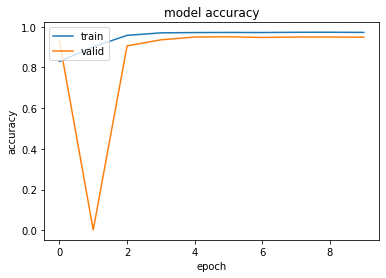

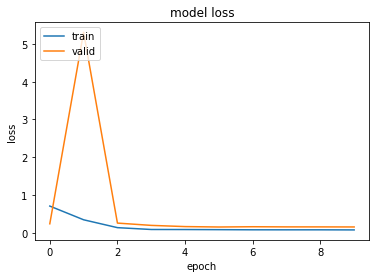

In [76]:
import matplotlib.pyplot as plt

plt.plot(history_vgg.history['accuracy'])
plt.plot(history_vgg.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_vgg.history['loss'])
plt.plot(history_vgg.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

Text(0.5, 0.98, "CM when threshold '>0.5'")

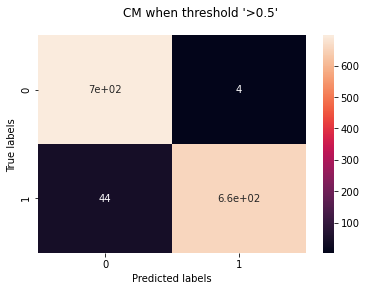

In [67]:

import seaborn as sns
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

y_pred = vgg.predict(X_test, workers=0)
y_pred = np.where(y_pred>0.5, 1, 0)
cm = metrics.confusion_matrix(label_test, y_pred)
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.suptitle("CM when threshold '>0.5'")

Text(0.5, 0.98, "CM when threshold '>0.75'")

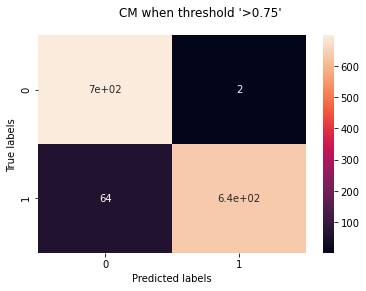

In [68]:
y_pred = vgg.predict(X_test, workers=0)
y_pred = np.where(y_pred>0.75, 1, 0)
cm = metrics.confusion_matrix(label_test, y_pred)
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.suptitle("CM when threshold '>0.75'")

In [71]:
print(classification_report(label_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.95       700
           1       1.00      0.91      0.95       700

    accuracy                           0.95      1400
   macro avg       0.96      0.95      0.95      1400
weighted avg       0.96      0.95      0.95      1400



In [120]:
lenet = Sequential()
lenet.add(Conv2D( 30 , (5,5) , input_shape = (224,224,3) ))
lenet.add(Activation('relu'))
lenet.add(MaxPooling2D(pool_size = (2,2) , strides = (2,2)))

lenet.add(Conv2D(50, (5,5)))
lenet.add(Activation('relu'))
lenet.add(MaxPooling2D(pool_size = (2,2) , strides = (2,2)))

lenet.add(Flatten())
lenet.add(Dense(500 , activation = 'relu'))
lenet.add(Dense(1, activation = 'sigmoid'))

lenet.compile(loss='binary_crossentropy' , metrics = ['accuracy'] , optimizer = 'Adam')



NameError: name 'Sequential' is not defined

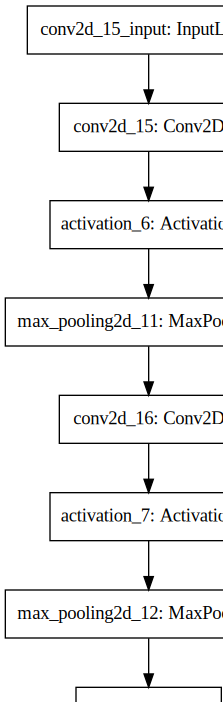

In [46]:
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

plot_model(lenet, to_file='model_lenet.png')
SVG(model_to_dot(lenet).create(prog='dot', format='svg'))

In [47]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_delta=0.0001, patience=1, verbose=1)

In [48]:
filepath_vgg="weights_lenet.hdf5"
checkpoint = ModelCheckpoint(filepath_vgg, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [49]:
import tensorflow as tf

In [50]:
vgg_callbacks = tf.keras.callbacks.TensorBoard(log_dir="logs/lenet", histogram_freq =1)

In [51]:
history_lenet = lenet.fit(X_train, label_train, epochs = 10, validation_split = 0.15, callbacks = [vgg_callbacks,lr_reduce, checkpoint])

Epoch 1/10
155/155 [==============================] - 563s 4s/step - loss: 212.7561 - accuracy: 0.6828 - val_loss: 0.6718 - val_accuracy: 0.7216

Epoch 00001: val_accuracy improved from -inf to 0.72165, saving model to weights_lenet.hdf5
Epoch 2/10
155/155 [==============================] - 532s 3s/step - loss: 0.4049 - accuracy: 0.8603 - val_loss: 0.6809 - val_accuracy: 0.7480

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 00002: val_accuracy improved from 0.72165 to 0.74800, saving model to weights_lenet.hdf5
Epoch 3/10
155/155 [==============================] - 512s 3s/step - loss: 0.2522 - accuracy: 0.9098 - val_loss: 0.6338 - val_accuracy: 0.7766

Epoch 00003: val_accuracy improved from 0.74800 to 0.77663, saving model to weights_lenet.hdf5
Epoch 4/10
155/155 [==============================] - 510s 3s/step - loss: 0.2050 - accuracy: 0.9262 - val_loss: 0.6888 - val_accuracy: 0.7778

Epoch 00004: ReduceLROnPlateau reducing learning rate to 1

In [52]:
lenet.save('lenet_covid.h5') 

In [53]:
print("Loss of the model is - " , lenet.evaluate(X_test, label_test)[0])
print("Accuracy of the model is - ", lenet.evaluate(X_test,label_test)[1]*100 , "%")

44/44 [==============================] - 25s 496ms/step - loss: 0.5656 - accuracy: 0.8229
Loss of the model is -  0.5655695199966431
44/44 [==============================] - 22s 496ms/step - loss: 0.5656 - accuracy: 0.8229
Accuracy of the model is -  82.2857141494751 %


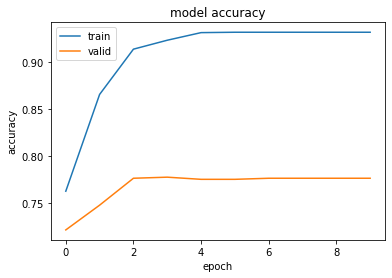

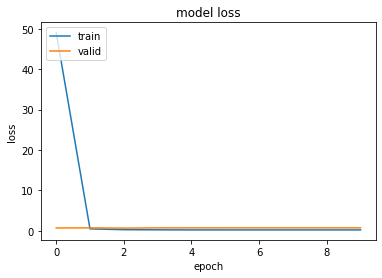

In [54]:
import matplotlib.pyplot as plt

plt.plot(history_lenet.history['accuracy'])
plt.plot(history_lenet.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_lenet.history['loss'])
plt.plot(history_lenet.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

Text(0.5, 0.98, "CM when threshold '>0.5'")

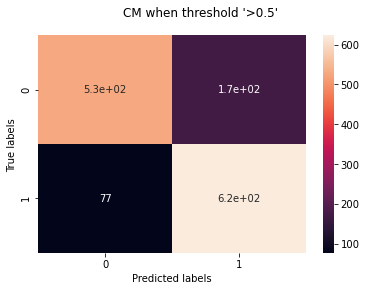

In [55]:
import seaborn as sns
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

y_pred = lenet.predict(X_test, workers=0)
y_pred = np.where(y_pred>0.5, 1, 0)
cm = metrics.confusion_matrix(label_test, y_pred)
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.suptitle("CM when threshold '>0.5'")

Text(0.5, 0.98, "CM when threshold '>0.75'")

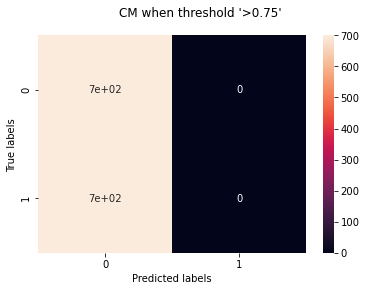

In [56]:
y_pred = vgg.predict(X_test, workers=0)
y_pred = np.where(y_pred>0.75, 1, 0)
cm = metrics.confusion_matrix(label_test, y_pred)
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.suptitle("CM when threshold '>0.75'")

In [57]:
print(classification_report(label_test,y_pred))

NameError: name 'classification_report' is not defined